Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading dataset

In [2]:
df = pd.read_csv('/content/new_test.csv')


Explore the Dataset

In [3]:
print(df.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   32    4        0          6        0        0     0        0      3   
1   37   10        3          6        0        0     0        0      4   
2   55    5        0          5        1        2     0        0      3   
3   44    2        1          0        1        0     0        1      4   
4   28    0        2          3        0        0     0        0      5   

   day_of_week  duration  campaign  poutcome  
0            3       131         5         1  
1            3       100         1         1  
2            2       131         2         1  
3            3        48         2         1  
4            0       144         2         1  


In [4]:
print(df.describe())

               age          job      marital    education      default  \
count  8238.000000  8238.000000  8238.000000  8238.000000  8238.000000   
mean     39.613498     3.729425     1.170430     3.740592     0.201141   
std       9.021371     3.597274     0.610371     2.134617     0.400878   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      32.000000     0.000000     1.000000     2.000000     0.000000   
50%      38.000000     2.000000     1.000000     3.000000     0.000000   
75%      47.000000     7.000000     2.000000     6.000000     0.000000   
max      55.000000    11.000000     3.000000     7.000000     1.000000   

           housing         loan      contact        month  day_of_week  \
count  8238.000000  8238.000000  8238.000000  8238.000000  8238.000000   
mean      1.072833     0.320952     0.364409     4.220685     2.020879   
std       0.985527     0.717918     0.481293     2.321464     1.386752   
min       0.000000     0.000000     0

In [22]:
print(df.isnull().sum())

# Check for missing values

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
dtype: int64


Data Visualization

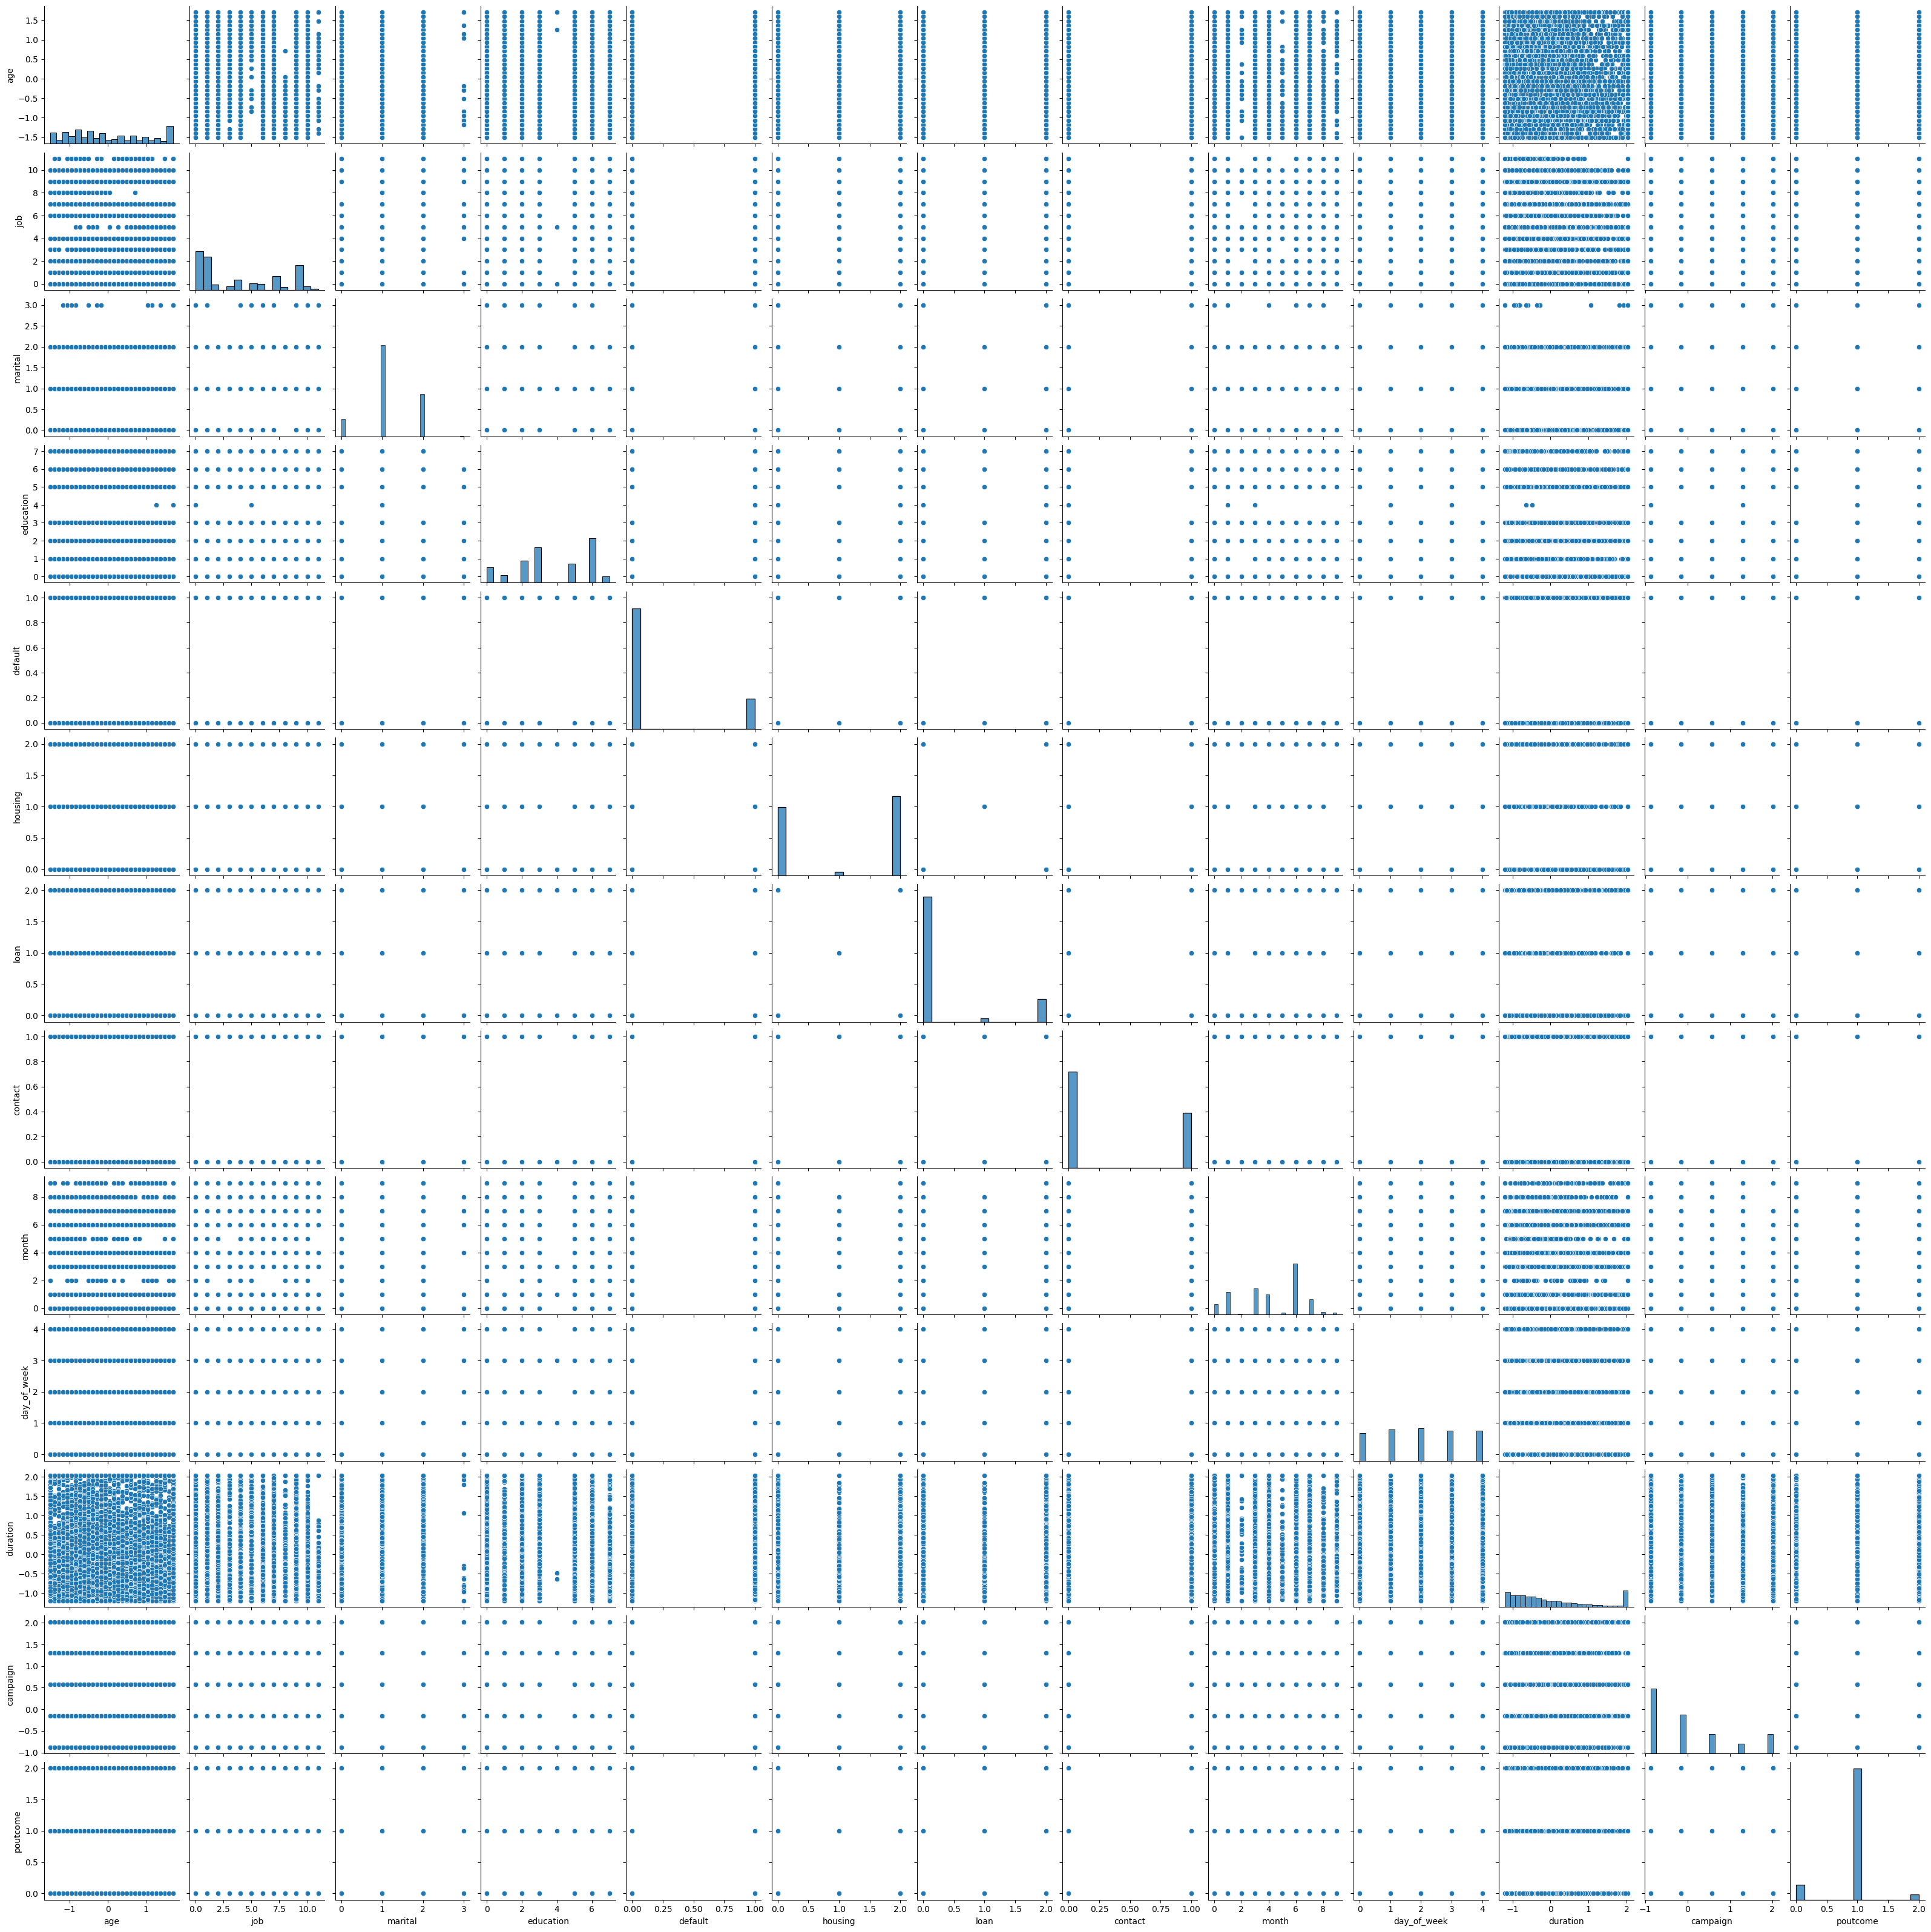

In [21]:
sns.pairplot(df)
plt.show()

Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Exploratory Data Analysis (EDA)


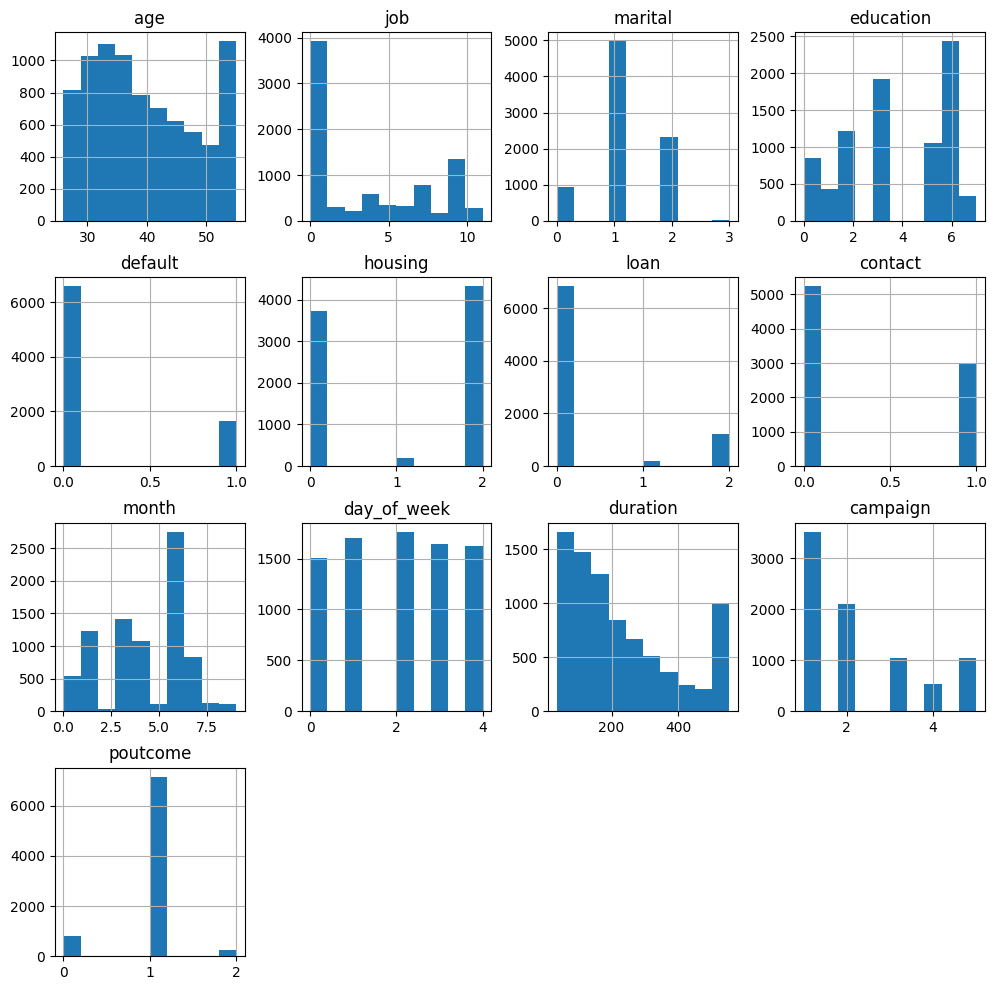

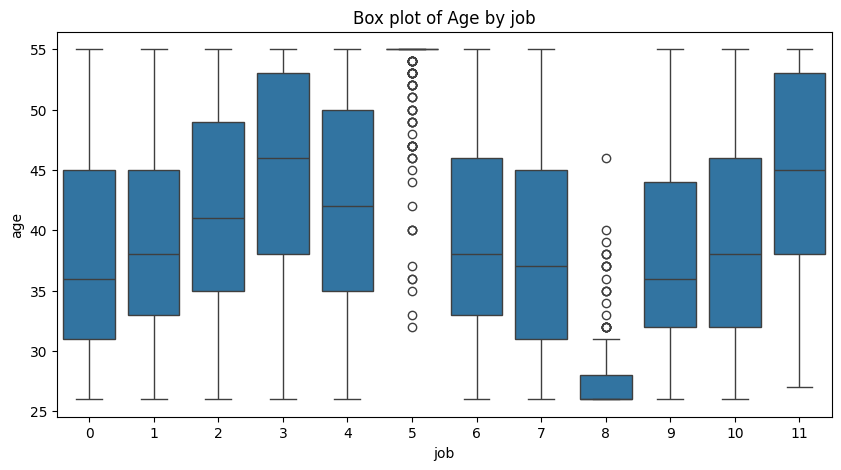

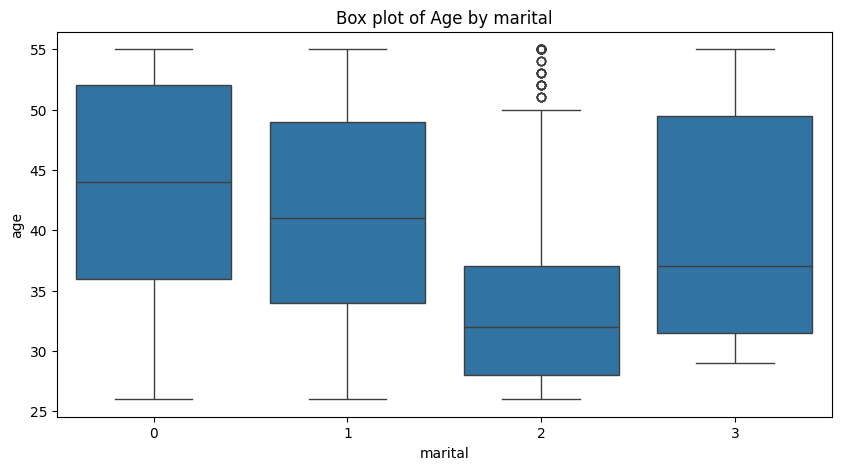

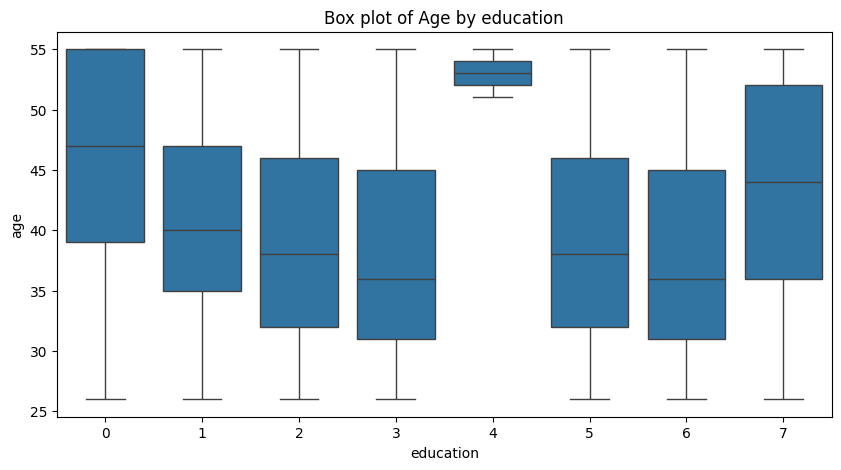

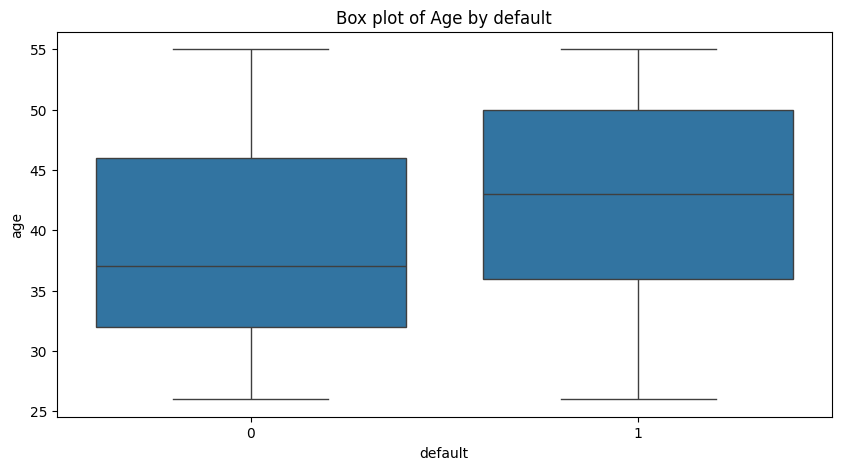

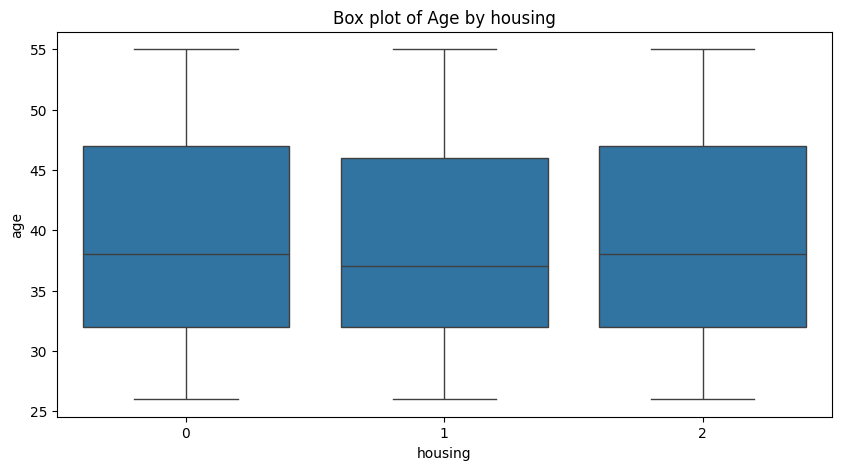

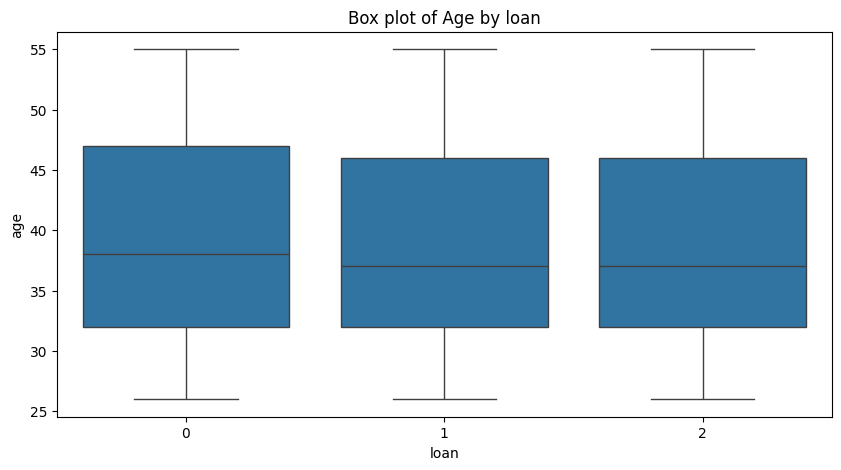

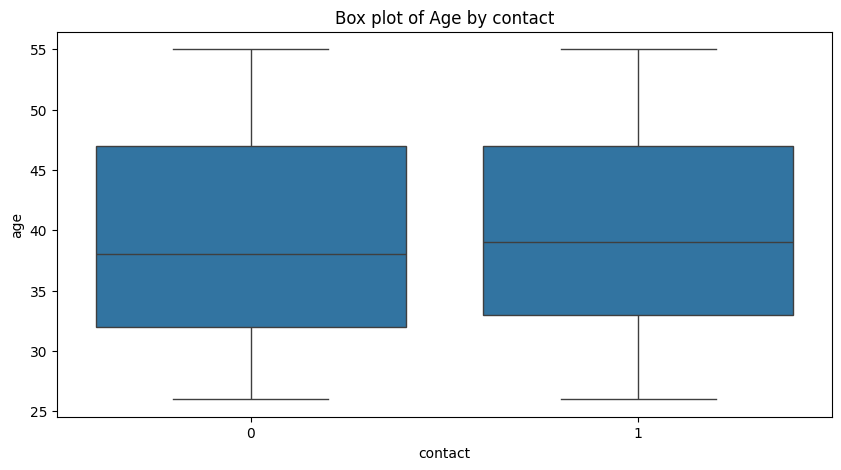

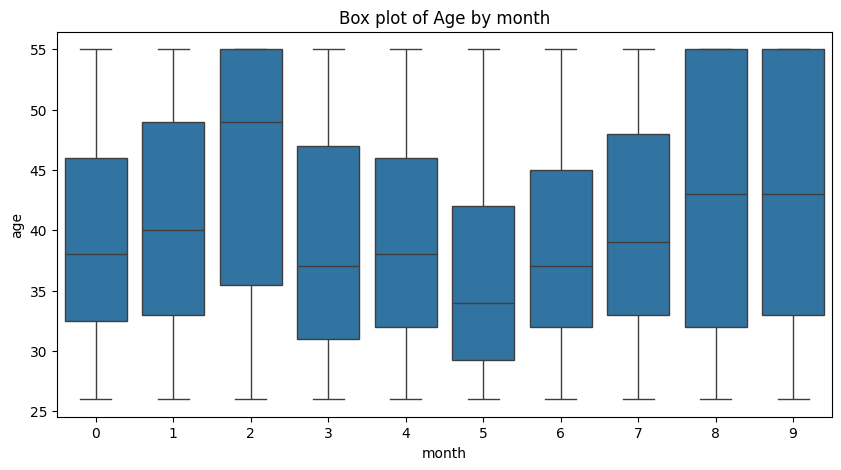

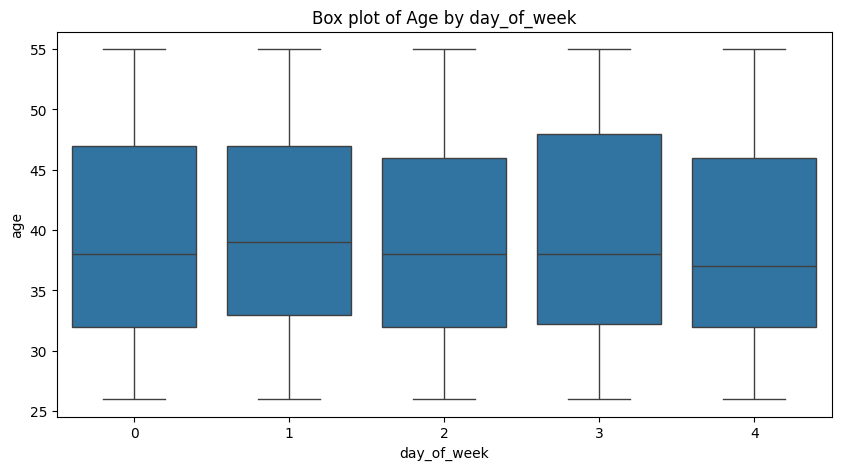

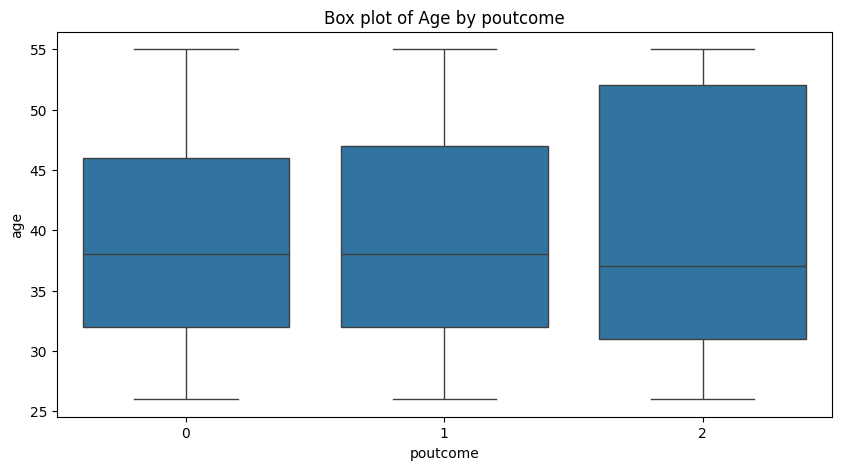

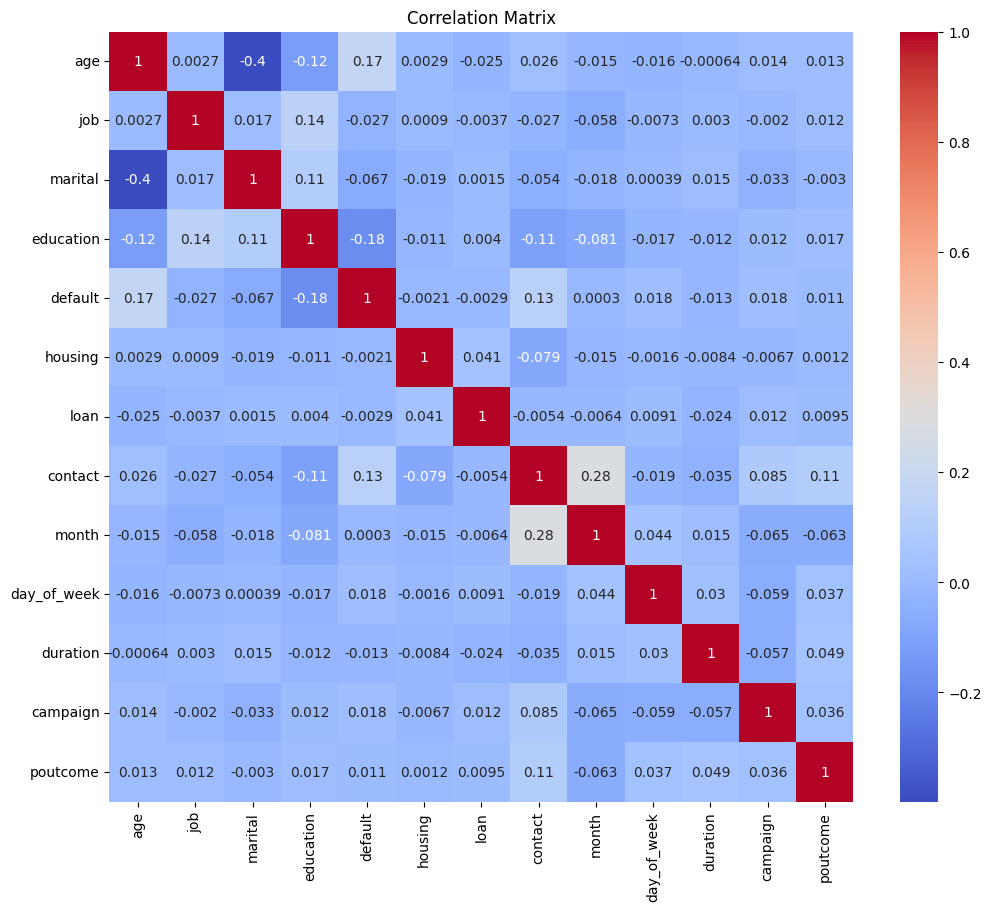

               age          job      marital    education      default  \
count  8238.000000  8238.000000  8238.000000  8238.000000  8238.000000   
mean     39.613498     3.729425     1.170430     3.740592     0.201141   
std       9.021371     3.597274     0.610371     2.134617     0.400878   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      32.000000     0.000000     1.000000     2.000000     0.000000   
50%      38.000000     2.000000     1.000000     3.000000     0.000000   
75%      47.000000     7.000000     2.000000     6.000000     0.000000   
max      55.000000    11.000000     3.000000     7.000000     1.000000   

           housing         loan      contact        month  day_of_week  \
count  8238.000000  8238.000000  8238.000000  8238.000000  8238.000000   
mean      1.072833     0.320952     0.364409     4.220685     2.020879   
std       0.985527     0.717918     0.481293     2.321464     1.386752   
min       0.000000     0.000000     0

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions
df.hist(figsize=(12, 12))
plt.show()

# Box plots for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    # Pass the DataFrame to the 'data' parameter
    sns.boxplot(x=column, y='age', data=df)
    plt.title(f'Box plot of Age by {column}')
    plt.show()

# Correlation analysis
correlation_matrix = df.corr() # Use df instead of data
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Summary statistics
print(df.describe())


Feature Engineering

In [16]:
# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'duration', 'campaign']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Model Building

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split data into features and target
X = df.drop('default', axis=1)  # Assuming 'default' is the target variable
y = df['default']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train a random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

Model Evaluation

In [19]:
# Evaluate models
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_predictions))
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, lr_predictions))

print("\nRandom Forest Classification Report")
print(classification_report(y_test, rf_predictions))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, rf_predictions))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1962
           1       0.38      0.03      0.05       510

    accuracy                           0.79      2472
   macro avg       0.59      0.51      0.47      2472
weighted avg       0.71      0.79      0.71      2472

Logistic Regression ROC-AUC Score: 0.5083348324039095

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.88      1962
           1       0.56      0.17      0.26       510

    accuracy                           0.80      2472
   macro avg       0.69      0.57      0.57      2472
weighted avg       0.76      0.80      0.76      2472

Random Forest ROC-AUC Score: 0.5660040774719675


Interpretation

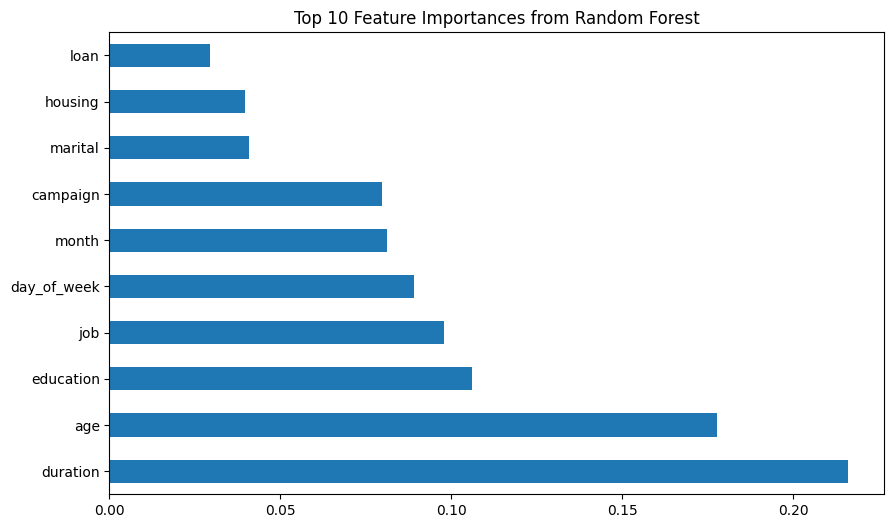

In [20]:
# Feature importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()